In [ ]:
# For New Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
dataset_paths = [
    '/content/drive/MyDrive/Data/medicine_prescription_records.csv',
    '/content/drive/MyDrive/Data/medicine_dataset.csv',
    '/content/drive/MyDrive/Data/medicine_data.csv',
    '/content/drive/MyDrive/Data/drugsComTrain_raw.csv',
    '/content/drive/MyDrive/Data/drug200.csv'
]

def display_csv_heads(paths):
    for path in paths:
        print(f"\n File: {path}")
        try:
            df = pd.read_csv(path)
            print(df.head())
            print(f" Shape: {df.shape} | Columns: {list(df.columns)}\n")
            print("-" * 80)
        except Exception as e:
            print(f" Could not read {path}. Error: {e}\n")

display_csv_heads(dataset_paths)


 File: /content/drive/MyDrive/Data/medicine_prescription_records.csv
   Unnamed: 0         specialty  years_practicing  \
0           0        Nephrology                 7   
1           1  General Practice                 7   
2           2  General Practice                 7   
3           3  General Practice                 7   
4           4        Nephrology                 6   

                             cms_prescription_counts  
0  DOXAZOSIN MESYLATE, MIDODRINE HCL, MEGESTROL A...  
1  CEPHALEXIN, AMOXICILLIN, HYDROCODONE-ACETAMINO...  
2           CEPHALEXIN, AMOXICILLIN, CLINDAMYCIN HCL  
3                                        AMOXICILLIN  
4  PIOGLITAZONE HCL, BENAZEPRIL HCL, DIAZEPAM, HY...  
 Shape: (239930, 4) | Columns: ['Unnamed: 0', 'specialty', 'years_practicing', 'cms_prescription_counts']

--------------------------------------------------------------------------------

 File: /content/drive/MyDrive/Data/medicine_dataset.csv


<ipython-input-8-996d1ee95705>:13: DtypeWarning: Columns (42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


   id                      name                     substitute0  \
0   1  augmentin 625 duo tablet  Penciclav 500 mg/125 mg Tablet   
1   2       azithral 500 tablet         Zithrocare 500mg Tablet   
2   3          ascoril ls syrup                 Solvin LS Syrup   
3   4      allegra 120mg tablet                    Lcfex Tablet   
4   5            avil 25 tablet              Eralet 25mg Tablet   

              substitute1              substitute2            substitute3  \
0  Moxikind-CV 625 Tablet  Moxiforce-CV 625 Tablet     Fightox 625 Tablet   
1         Azax 500 Tablet          Zady 500 Tablet  Cazithro 500mg Tablet   
2       Ambrodil-LX Syrup        Zerotuss XP Syrup         Capex LS Syrup   
3     Etofex 120mg Tablet     Nexofex 120mg Tablet    Fexise 120mg Tablet   
4                     NaN                      NaN                    NaN   

               substitute4 sideEffect0       sideEffect1     sideEffect2  ...  \
0  Novamox CV 625mg Tablet    Vomiting            Nau

In [ ]:
#  Data Preprocessing

In [9]:
print("Loading datasets...")
medicine_prescription = pd.read_csv('/content/drive/MyDrive/Data/medicine_prescription_records.csv')
medicine_dataset = pd.read_csv('/content/drive/MyDrive/Data/medicine_dataset.csv', low_memory=False)
medicine_data = pd.read_csv('/content/drive/MyDrive/Data/medicine_data.csv')
drugs_reviews = pd.read_csv('/content/drive/MyDrive/Data/drugsComTrain_raw.csv')
drug200 = pd.read_csv('/content/drive/MyDrive/Data/drug200.csv')
print("Datasets loaded successfully.\n")

Loading datasets...
Datasets loaded successfully.



In [10]:
print("Starting data preprocessing...\n")

# 1. Handling Missing Values
print("Handling missing values...")
medicine_prescription.dropna(inplace=True)
medicine_dataset.fillna("Unknown", inplace=True)
medicine_data.dropna(inplace=True)
drugs_reviews.dropna(subset=['condition', 'review'], inplace=True)
drug200.dropna(inplace=True)
print("Missing values handled.\n")

# 2. Dealing with Mixed Data Types
print("Converting product_price to numeric format...")
medicine_dataset = medicine_dataset.convert_dtypes()
medicine_data['product_price'] = pd.to_numeric(
    medicine_data['product_price'].replace('[\\u20B9,]', '', regex=True), errors='coerce'
)
medicine_data.dropna(subset=['product_price'], inplace=True)
print("Data types converted.\n")

# 3. Parsing drug_interactions JSON column (with enhanced error handling)
print("Parsing drug_interactions column...")
def parse_json_column(x):
    try:
        if isinstance(x, str):
            return list(json.loads(x).get('drug', []))
        return []
    except (json.JSONDecodeError, TypeError, ValueError):
        return []

medicine_data['drug_interactions'] = medicine_data['drug_interactions'].apply(parse_json_column)
print("JSON parsing complete.\n")

# 4. Feature Engineering: Sentiment Analysis on reviews
print("Performing sentiment analysis on reviews...")
drugs_reviews['sentiment_score'] = drugs_reviews['review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
print("Sentiment scores calculated.\n")

# 5. Data Integration: Merging datasets
print("Merging datasets...")
merged_data = pd.merge(drugs_reviews, medicine_dataset, left_on='drugName', right_on='name', how='left')
merged_data = pd.merge(merged_data, medicine_data, left_on='drugName', right_on='product_name', how='left')
print(f"Merged dataset shape: {merged_data.shape}\n")

# Save preprocessed data
merged_data.to_csv('/content/preprocessed_merged_data.csv', index=False)
print("Preprocessed data saved successfully.\n")

Starting data preprocessing...

Handling missing values...
Missing values handled.

Converting product_price to numeric format...
Data types converted.

Parsing drug_interactions column...
JSON parsing complete.

Performing sentiment analysis on reviews...
Sentiment scores calculated.

Merging datasets...
Merged dataset shape: (160398, 74)

Preprocessed data saved successfully.



In [11]:
# Exploratory Data Analysis (EDA)

Starting Enhanced EDA for Project Objective...

Descriptive Statistics for Ratings:
 count    160398.000000
mean          6.995923
std           3.272303
min           1.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: rating, dtype: float64
Descriptive Statistics for Product Prices:
 count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: product_price, dtype: float64


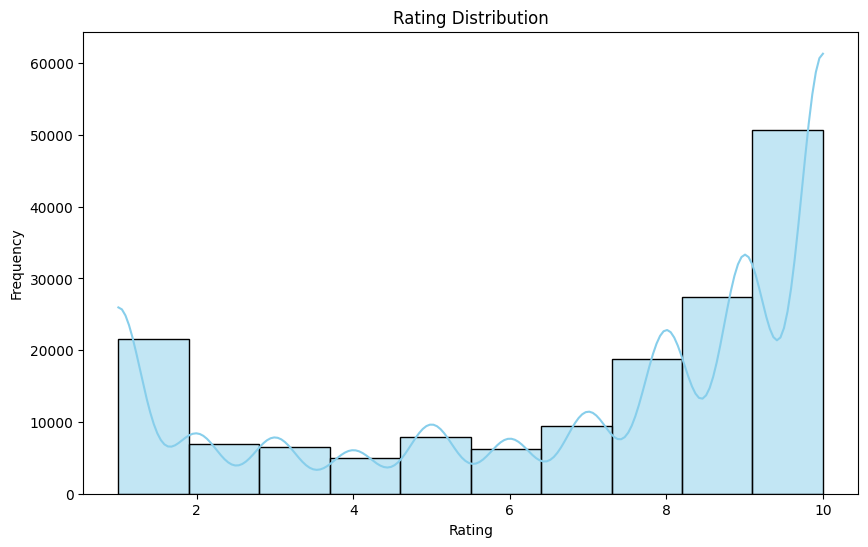

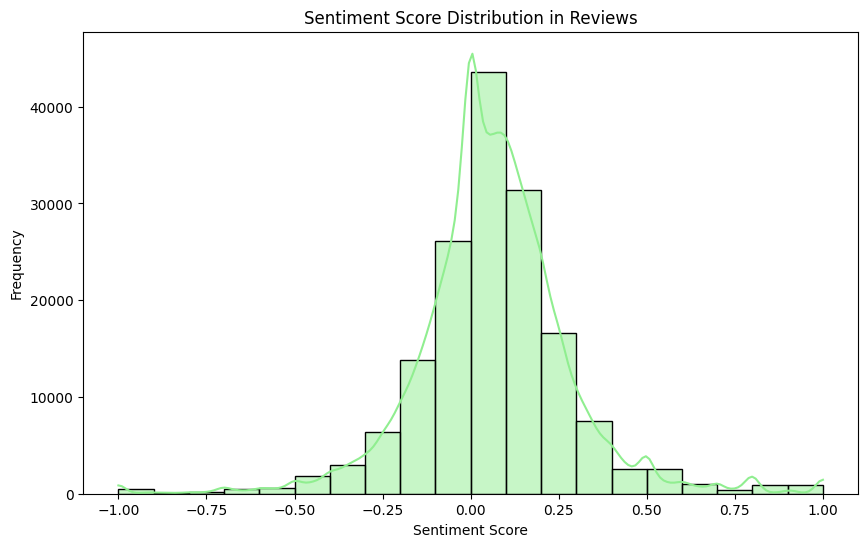

<ipython-input-12-7eb73cac1de5>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_conditions.index, y=top_conditions.values, palette='viridis')


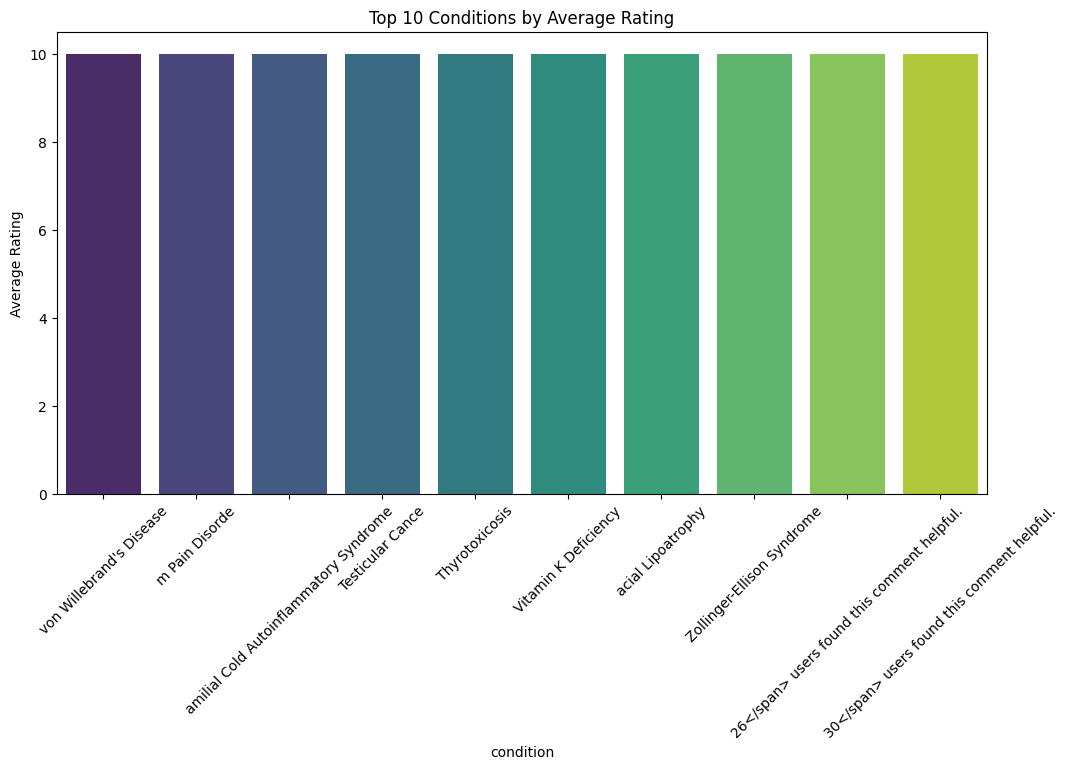

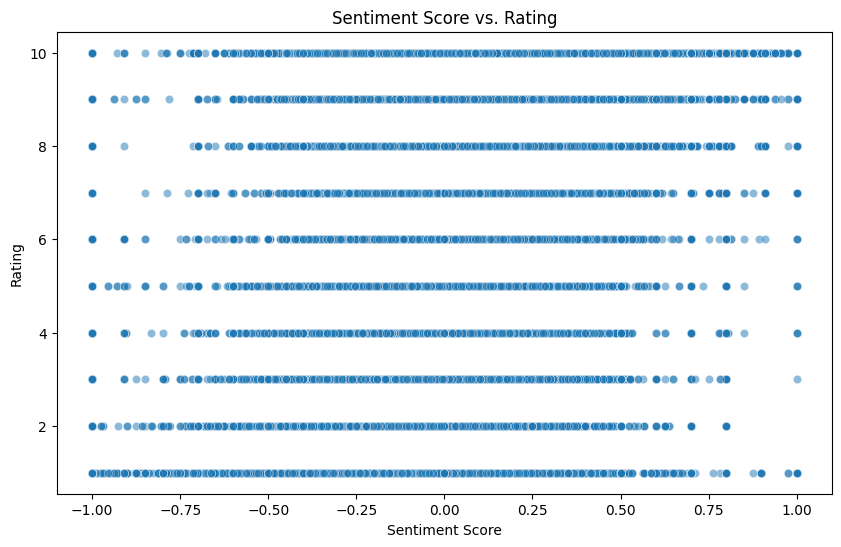

<ipython-input-12-7eb73cac1de5>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_specialties.index, y=top_specialties.values, palette='muted')


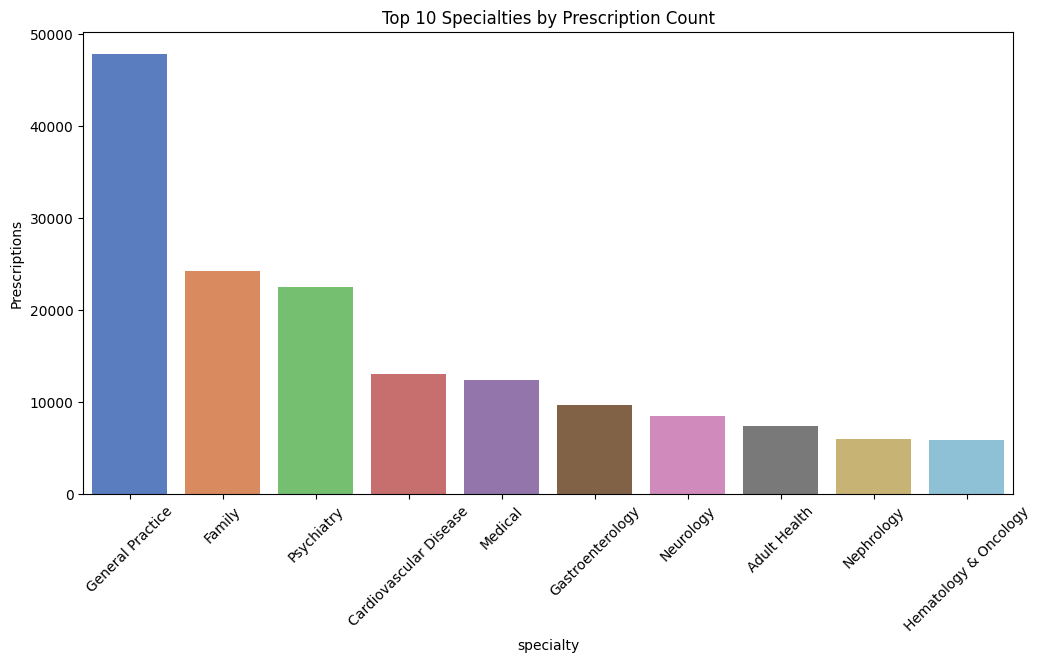

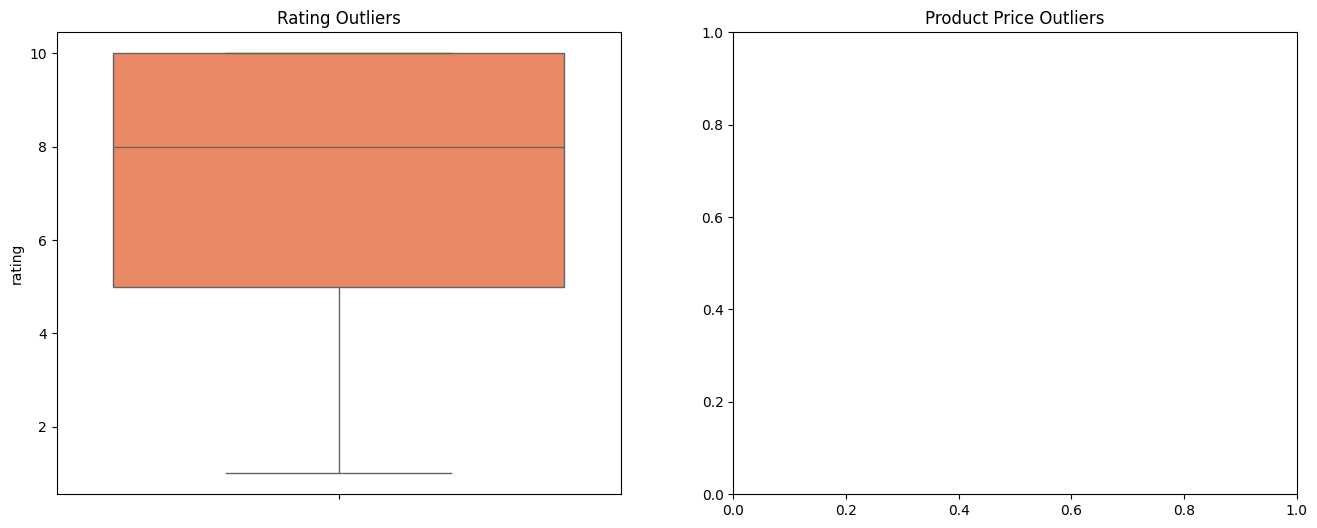

<ipython-input-12-7eb73cac1de5>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=interaction_counts.index, y=interaction_counts.values, palette='Set2')


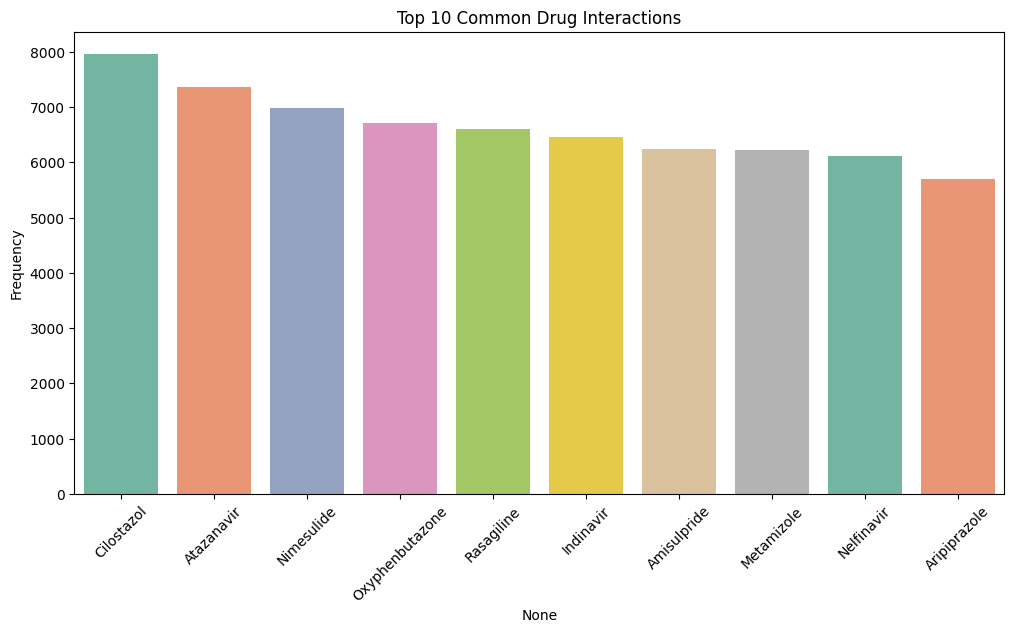

<ipython-input-12-7eb73cac1de5>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BP', data=drug200, palette='pastel')


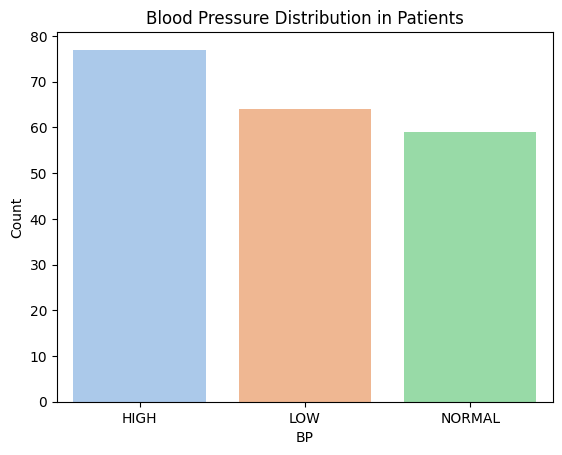

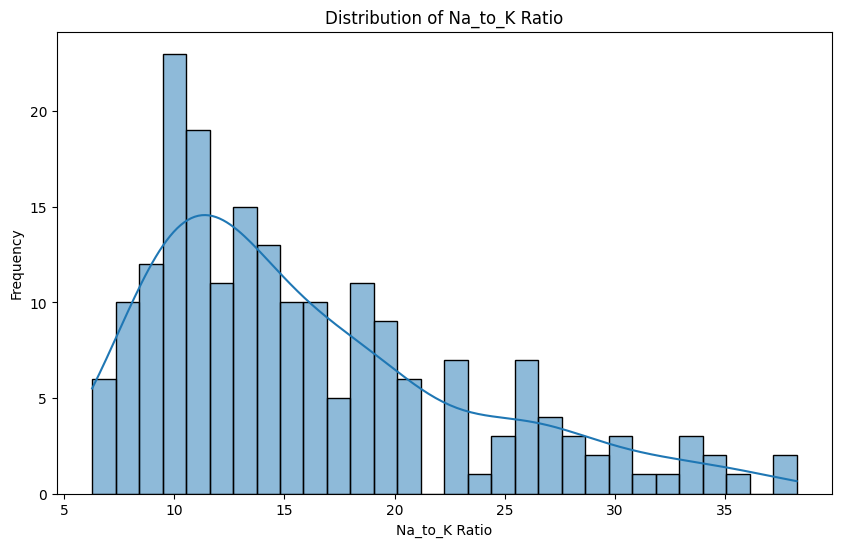

In [12]:
print("Starting Enhanced EDA for Project Objective...\n")

# 1. Summary Statistics
print("Descriptive Statistics for Ratings:\n", merged_data['rating'].describe())
print("Descriptive Statistics for Product Prices:\n", merged_data['product_price'].describe())

# 2. Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['rating'], bins=10, kde=True, color='skyblue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# 3. Sentiment Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['sentiment_score'], bins=20, kde=True, color='lightgreen')
plt.title('Sentiment Score Distribution in Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# 4. Top Conditions by Rating
top_conditions = merged_data.groupby('condition')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_conditions.index, y=top_conditions.values, palette='viridis')
plt.title('Top 10 Conditions by Average Rating')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

# 7. Sentiment vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sentiment_score', y='rating', data=merged_data, alpha=0.5)
plt.title('Sentiment Score vs. Rating')
plt.xlabel('Sentiment Score')
plt.ylabel('Rating')
plt.show()

# 8. Prescription Trends by Specialty
top_specialties = medicine_prescription['specialty'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_specialties.index, y=top_specialties.values, palette='muted')
plt.title('Top 10 Specialties by Prescription Count')
plt.ylabel('Prescriptions')
plt.xticks(rotation=45)
plt.show()

# 9. Outlier Detection for Key Features
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(y=merged_data['rating'].dropna(), ax=axes[0], color='coral').set(title='Rating Outliers')
sns.boxplot(y=merged_data['product_price'].dropna(), ax=axes[1], color='lightblue').set(title='Product Price Outliers')
plt.show()

# 10. Drug Interaction Frequency
drug_interactions_flat = [item for sublist in medicine_data['drug_interactions'] for item in sublist]
interaction_counts = pd.Series(drug_interactions_flat).value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=interaction_counts.index, y=interaction_counts.values, palette='Set2')
plt.title('Top 10 Common Drug Interactions')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# 11. Patient Demographics Analysis
drug200['BP'] = drug200['BP'].astype(str)
sns.countplot(x='BP', data=drug200, palette='pastel')
plt.title('Blood Pressure Distribution in Patients')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(drug200['Na_to_K'], bins=30, kde=True)
plt.title('Distribution of Na_to_K Ratio')
plt.xlabel('Na_to_K Ratio')
plt.ylabel('Frequency')
plt.show()


In [13]:
# --- Milestone 2: Feature Engineering ---

from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

In [14]:
# Calculate length of each review
merged_data['review_length'] = merged_data['review'].astype(str).apply(len)

# Log transformation to normalize skew in 'usefulCount'
merged_data['log_usefulCount'] = np.log1p(merged_data['usefulCount'])

# Create an interaction term between sentiment and usefulness
merged_data['sentiment_useful_interaction'] = merged_data['sentiment_score'] * merged_data['log_usefulCount']

# Average rating for each condition - might help the model learn better patterns
avg_rating = merged_data.groupby('condition')['rating'].mean().to_dict()
merged_data['avg_rating_per_condition'] = merged_data['condition'].map(avg_rating)

# Encode categorical fields like condition and manufacturer
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
merged_data['condition_encoded'] = label_enc.fit_transform(merged_data['condition'].astype(str))
merged_data['manufacturer_encoded'] = label_enc.fit_transform(merged_data['product_manufactured'].astype(str))

# Define binary classification target (1 = good rating, 0 = low rating)
merged_data['good_rating'] = merged_data['rating'].apply(lambda x: 1 if x >= 7 else 0)

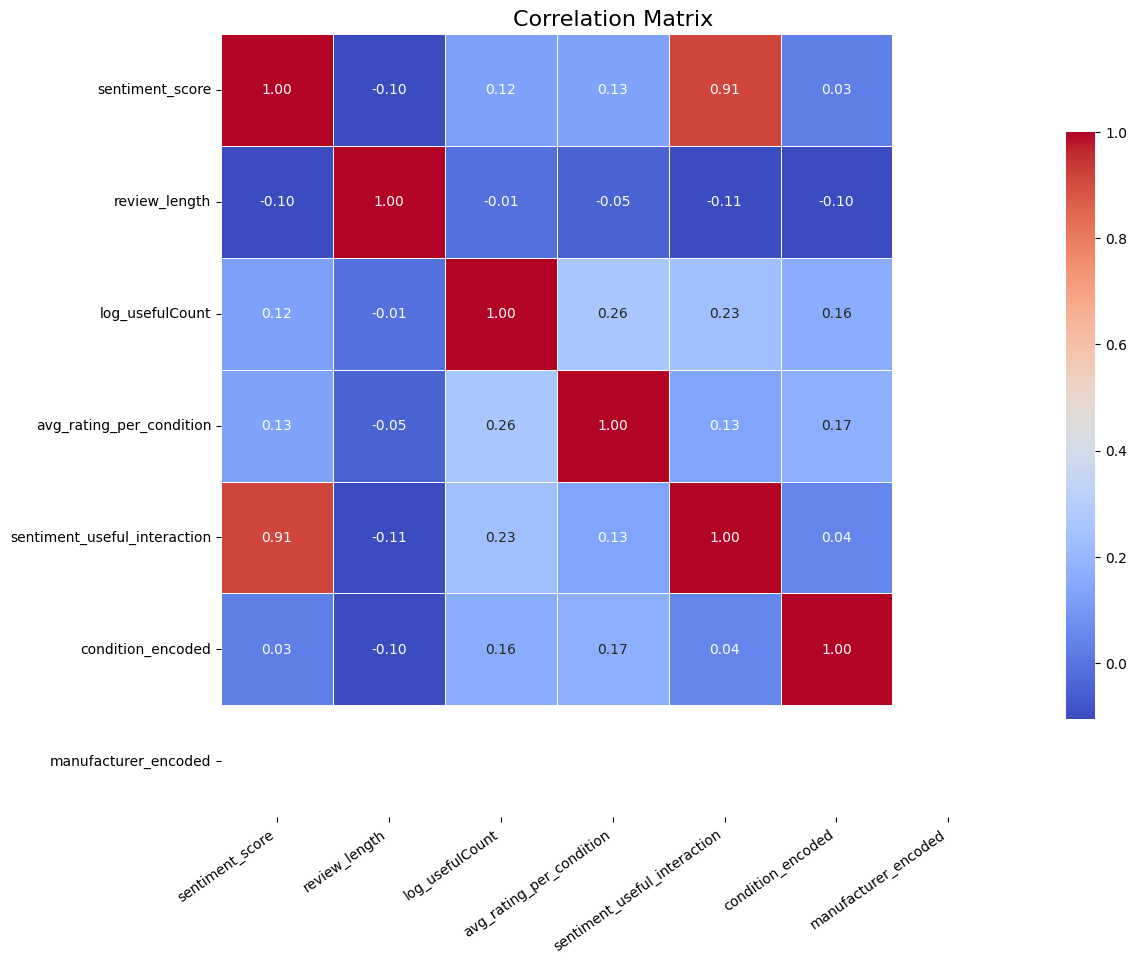

In [15]:
# --- Feature Selection ---
# Looking at how features relate to each other

import matplotlib.pyplot as plt
import seaborn as sns

# Select important features for correlation
selected_features = [
    'sentiment_score', 'review_length', 'log_usefulCount',
    'avg_rating_per_condition', 'sentiment_useful_interaction',
    'condition_encoded', 'manufacturer_encoded'
]

# Calculate correlation between features
corr = merged_data[selected_features].corr()

# Plot heatmap with better spacing and visibility
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True,
            cbar_kws={"shrink": 0.75})

plt.xticks(rotation=35, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout(pad=2.0)
plt.show()

In [16]:
# --- Train-Test Split + Modeling ---

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

# Prepare feature matrix and target
X = merged_data[selected_features].dropna()
y = merged_data.loc[X.index, 'good_rating']

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numeric values for models that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


== Logistic Regression ==
              precision    recall  f1-score   support

           0       0.65      0.43      0.52     10790
           1       0.75      0.88      0.81     21290

    accuracy                           0.73     32080
   macro avg       0.70      0.66      0.66     32080
weighted avg       0.72      0.73      0.71     32080


== Random Forest ==
              precision    recall  f1-score   support

           0       0.81      0.74      0.77     10790
           1       0.87      0.91      0.89     21290

    accuracy                           0.85     32080
   macro avg       0.84      0.82      0.83     32080
weighted avg       0.85      0.85      0.85     32080


== SVM ==
              precision    recall  f1-score   support

           0       0.68      0.40      0.50     10790
           1       0.75      0.91      0.82     21290

    accuracy                           0.74     32080
   macro avg       0.72      0.65      0.66     32080
weighted avg   

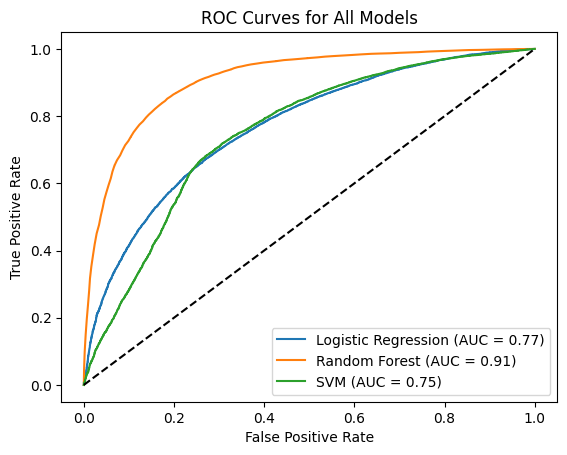

Saved model_metrics.csv
Saved feature_importances.csv
Saved roc_curve.png


In [17]:
# --- Model Training and Evaluation ---

# Set up models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True)
}

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

all_metrics = []

# Train and test each model
for name, model in models.items():
    print(f"\n== {name} ==")

    # Train
    if name == 'Random Forest':
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        probs = model.predict_proba(X_test)[:, 1]
    else:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
        probs = model.predict_proba(X_test_scaled)[:, 1]

    # Evaluation
    print(classification_report(y_test, preds))
    auc_score = roc_auc_score(y_test, probs)

    all_metrics.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, preds),
        'Precision': precision_score(y_test, preds),
        'Recall': recall_score(y_test, preds),
        'F1-Score': f1_score(y_test, preds),
        'ROC-AUC': auc_score
    })

    # Plot ROC
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

# ROC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.show()
# Collect model metrics
metrics_list = []

for name, model in models.items():
    if name == 'Random Forest':
        preds = model.predict(X_test)
        probs = model.predict_proba(X_test)[:, 1]
    else:
        preds = model.predict(X_test_scaled)
        probs = model.predict_proba(X_test_scaled)[:, 1]

    metrics_list.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, preds),
        'Precision': precision_score(y_test, preds),
        'Recall': recall_score(y_test, preds),
        'F1-Score': f1_score(y_test, preds),
        'ROC-AUC': roc_auc_score(y_test, probs)
    })

# Create DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Save metrics for Streamlit
metrics_df.to_csv('model_metrics.csv', index=False)
print("Saved model_metrics.csv")

# Extract feature importances from Random Forest
rf_model = models['Random Forest']

feat_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Save feature importances for Streamlit
feat_imp.to_csv('feature_importances.csv', index=False)
print("Saved feature_importances.csv")

# Save ROC curve image
plt.figure()
for name, model in models.items():
    if name == 'Random Forest':
        probs = model.predict_proba(X_test)[:, 1]
    else:
        probs = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, label=f'{name}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.tight_layout()
plt.savefig('roc_curve.png')
plt.close()
print("Saved roc_curve.png")

In [85]:
# Grab the trained Random Forest model from your dictionary
rf_model = models['Random Forest']

# Extract and save feature importances
import pandas as pd

feat_imp = pd.DataFrame({
    'Feature': X_train.columns,  # or X.columns if applicable
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Save to CSV
feat_imp.to_csv('feature_importances.csv', index=False)
print("Saved feature_importances.csv")


Saved feature_importances.csv


In [86]:

# Save ROC curve image
plt.figure()
for name, model in models.items():
    if name == 'Random Forest':
        probs = model.predict_proba(X_test)[:, 1]
    else:
        probs = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, label=f'{name}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.tight_layout()
plt.savefig('roc_curve.png')
plt.close()
print("Saved roc_curve.png")

Saved roc_curve.png


In [87]:
# --- Compare Models in a Table ---

results_df = pd.DataFrame(all_metrics).sort_values(by='F1-Score', ascending=False)
print(results_df)

# Optional: Plot bar chart comparison
results_df.set_index('Model')[['F1-Score', 'ROC-AUC']].plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
1        Random Forest  0.852026   0.872540  0.909958  0.890856  0.909711
2                  SVM  0.735411   0.748563  0.905449  0.819565  0.751990
0  Logistic Regression  0.729489   0.752664  0.882339  0.812359  0.769604


In [88]:
# --- Compare Models in a Table ---

results_df = pd.DataFrame(all_metrics).sort_values(by='F1-Score', ascending=False)
print(results_df)

# Optional: Plot bar chart comparison
results_df.set_index('Model')[['F1-Score', 'ROC-AUC']].plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
1        Random Forest  0.852026   0.872540  0.909958  0.890856  0.909711
2                  SVM  0.735411   0.748563  0.905449  0.819565  0.751990
0  Logistic Regression  0.729489   0.752664  0.882339  0.812359  0.769604


In [131]:
# Milestone - 3

In [132]:
# Evaluation + Interpretation Code

In [91]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Train the model (Random Forest)
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)

# Predict
y_pred = best_model.predict(X_test)
y_probs = best_model.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# --- SHAP Interpretation (Crash-Safe) ---

# 1. Take a small sample to limit memory
X_sample = X_test.sample(n=20, random_state=42)

# 2. Rebuild as DataFrame to ensure correct columns
X_sample = pd.DataFrame(X_sample.values, columns=X_train.columns)

# 3. Compute SHAP values
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_sample)   # shape = (20, 7, 2)

# 4. Extract class-1 values: (n_samples, n_features)
shap_class1 = shap_values[:, :, 1]              # now (20, 7)

# 5. Compute mean absolute SHAP per feature
mean_abs_shap = np.abs(shap_class1).mean(axis=0)

# 6. Build a DataFrame and sort by importance
shap_df = pd.DataFrame({
    'Feature': X_sample.columns,
    'Mean |SHAP|': mean_abs_shap
}).sort_values(by='Mean |SHAP|', ascending=False)

# 7. Plot with plain matplotlib
plt.figure(figsize=(8, 5))
plt.barh(shap_df['Feature'], shap_df['Mean |SHAP|'])
plt.gca().invert_yaxis()
plt.xlabel("Mean |SHAP Value|")
plt.title("Feature Importance (SHAP for Class 1)")
plt.tight_layout()
plt.show()


Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.74      0.77     10790
           1       0.87      0.91      0.89     21290

    accuracy                           0.85     32080
   macro avg       0.84      0.82      0.83     32080
weighted avg       0.85      0.85      0.85     32080



In [94]:
# after your plotting code
# plt.tight_layout()
# plt.savefig("shap_class1_bar.png", dpi=300, bbox_inches="tight")
# print("Saved shap_class1_bar.png")


Saved shap_class1_bar.png


In [95]:
# shap_df.to_csv("shap_class1_bar.csv", index=False)
# print("Saved shap_class1_bar.csv")


Saved shap_class1_bar.csv


In [96]:
# shap.summary_plot(shap_class1, X_sample)

# 1. Create a new figure (optionally set size)
plt.figure(figsize=(8, 6))

# 2. Draw the summary plot without showing it
# shap.summary_plot(shap_class1, X_sample, show=False)

# 3. Grab the current figure and save it
# plt.gcf().savefig("shap_summary_beeswarm.png", bbox_inches="tight")

# 4. Close to free memory
# plt.close()

In [97]:
import os
import matplotlib
matplotlib.use("Agg")      # Use a non-interactive backend
import matplotlib.pyplot as plt
import shap

# Disable any GPU ops
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Sample index
# i = 0

# Generate the force plot purely on CPU/back-end
# fig = shap.force_plot(
    explainer.expected_value[1],
    shap_class1[i, :],
    X_sample.iloc[i, :],
    matplotlib=True,
    show=False
# )

# Save to file
# fig.savefig("shap_force_plot_sample_0.png", bbox_inches="tight")
# plt.close(fig)

# print("Force plot saved as shap_force_plot_sample_0.png")



Force plot saved as shap_force_plot_sample_0.png


# Streamlit

In [159]:
%%bash
cat > app.py << 'EOF'
import os
# 0) force CPU‐only for SHAP force_plot
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import matplotlib
matplotlib.use("Agg")

import streamlit as st
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    RocCurveDisplay
)
from streamlit_lottie import st_lottie
import requests

# 1) Page config & CSS
st.set_page_config(
    page_title="💊 MedRec Dashboard",
    layout="wide",
    page_icon="💊"
)
st.markdown("""
<div style="background-color:#4B91F6;padding:15px;border-radius:10px">
  <h1 style="color:white;text-align:center;margin:0">
    💊 Medication Recommendation System
  </h1>
</div>
""", unsafe_allow_html=True)

# 2) Lottie in sidebar
def load_lottie(url):
    r = requests.get(url)
    return r.json() if r.status_code == 200 else None

with st.sidebar:
    lottie_med = load_lottie("https://assets7.lottiefiles.com/packages/lf20_jbrw3hcz.json")
    if lottie_med:
        st_lottie(lottie_med, height=200)

# 3) Load model & data (cached)
@st.cache_data(show_spinner=False)
def load_artifacts():
    model = joblib.load("best_rf_model.joblib")
    X_test = pd.read_csv("X_test.csv", index_col=0)
    y_test = pd.read_csv("y_test.csv", index_col=0).values.ravel()
    explainer = shap.TreeExplainer(model)
    return model, X_test, y_test, explainer

with st.spinner("🚀 Loading model & data..."):
    model, X_test, y_test, explainer = load_artifacts()
    y_probs = model.predict_proba(X_test)[:, 1]

# 4) Sidebar controls
st.sidebar.header("Controls")
threshold = st.sidebar.slider("Classification threshold", 0.0, 1.0, 0.5, 0.01)
show_pr = st.sidebar.checkbox("Show PR Curve", True)
show_cm = st.sidebar.checkbox("Show Confusion Matrix", True)

# 5) Navigation
page = st.sidebar.radio("Go to", [
    "Metrics", "ROC Curve", "Feature Importances",
    "SHAP: Bar", "SHAP: Beeswarm", "SHAP: Force"
])

# 6) Page: Metrics
if page == "Metrics":
    st.header("Model Performance Metrics")
    metrics = pd.read_csv("model_metrics.csv")
    st.dataframe(metrics, use_container_width=True)

# 7) Page: ROC Curve
elif page == "ROC Curve":
    st.header("ROC Curve")
    fig, ax = plt.subplots()
    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax)
    st.pyplot(fig, use_container_width=True)

# 8) Page: Feature Importances
elif page == "Feature Importances":
    st.header("Random Forest Feature Importances")
    feat_imp = pd.read_csv("feature_importances.csv")
    fig, ax = plt.subplots(figsize=(8,5))
    sns.barplot(x="Importance", y="Feature", data=feat_imp, ax=ax)
    ax.set_title("Feature Importances")
    st.pyplot(fig, use_container_width=True)

# 9) Page: SHAP Bar
elif page == "SHAP: Bar":
    st.header("SHAP: Mean |SHAP| per Feature")
    # sample + full SHAP values cached
    @st.cache_data
    def get_shap_summary(n=100):
        Xs = X_test.sample(n, random_state=42)
        vals = explainer.shap_values(Xs)[1]
        df = pd.DataFrame({
            "Feature": Xs.columns,
            "Mean |SHAP|": np.abs(vals).mean(0)
        }).sort_values("Mean |SHAP|", ascending=False)
        return df

    shap_df = get_shap_summary(100)
    fig, ax = plt.subplots(figsize=(8,5))
    ax.barh(shap_df["Feature"], shap_df["Mean |SHAP|"])
    ax.invert_yaxis()
    ax.set_xlabel("Mean |SHAP|")
    st.pyplot(fig, use_container_width=True)

# 10) Page: SHAP Beeswarm
elif page == "SHAP: Beeswarm":
    st.header("SHAP Global Summary (Beeswarm)")
    @st.cache_data
    def get_beeswarm(n=200):
        Xs = X_test.sample(n, random_state=42)
        vals = explainer.shap_values(Xs)[1]
        return Xs, vals

    Xs, vals = get_beeswarm()
    fig, ax = plt.subplots(figsize=(8,4))
    shap.summary_plot(vals, Xs, show=False)
    st.pyplot(fig, use_container_width=True)

# 11) Page: SHAP Force
else:
    st.header("SHAP Force Plot (Sample 0)")
    idx = st.number_input("Sample index", 0, len(X_test)-1, 0)
    sv0 = explainer.shap_values(X_test.iloc[[idx]])[1][0]
    fig = shap.force_plot(
        explainer.expected_value[1],
        sv0,
        X_test.iloc[idx],
        matplotlib=True, show=False
    )
    st.pyplot(fig, use_container_width=True)

# 12) Footer in sidebar
st.sidebar.markdown("---")
st.sidebar.write("Built with ❤️ • Powered by Streamlit")
EOF




In [164]:
%%bash
sed -i \
  -e 's/st\.experimental_memo/st.cache_data/g' \
  -e 's/st\.experimental_singleton/st.cache_resource/g' \
  app.py

In [160]:
%%bash --bg
# start Streamlit and write its logs to streamlit.log
nohup streamlit run app.py \
   --server.port 8501 \
   --server.address 0.0.0.0 \
   > streamlit.log 2>&1 &
sleep 2
echo "→ Streamlit log tail:"
tail -n 20 streamlit.log


In [147]:
from google.colab import files
uploaded = files.upload()


Saving app_py.py to app_py.py


In [161]:
!ngrok config add-authtoken 2wBbgGWvhPBYOmXaKAlCDajUNNS_4Cn7haxdm7zD1XwNQxbUt

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [162]:
from pyngrok import ngrok
ngrok.kill()  # Kill all tunnels

In [163]:
public_url = ngrok.connect(8501)
print("Streamlit is live at:", public_url)

!streamlit run app.py &>/dev/null &


Streamlit is live at: NgrokTunnel: "https://5d42-34-125-224-8.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
#!streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py
